<h1 style="text-align: center;">Data Cleaning process - Loan dataset</h1>

---

### Introduction
LendingClub is a financial services company. LendingClub enabled borrowers to create unsecured personal loans between 1,000 USD and 40,000 USD. The standard loan period was three years. Lenders were able to browse the loan listings on LendingClub website and select loans that they wanted to lend in based on the information about the borrower, amount of loan, loan grade, and loan purpose. Lender made money from the interest on these loans. LendingClub made money by charging borrowers and lender a service fee.

The objective of this project is to **gain a better understanding of the dataset, uncover insights, identify trends, and reveal potential issues within the loan data.**

But before analyzing the data, we need to **clean the data** to make sure that the data is accurate and consistent. After the data is cleaned, it becomes ready for data analysis.

### Cleaning task

1. [Remove columns with too many missing Values (> 50% NA values)](#removenacol)

2. [Remove columns that have only unique values](#removeuniquecol)

3. [Remove unnecessary columns](#removeunnecessarycol)

4. [Delete rows that have NA values](#removenarow)

5. [Delete duplicated rows](#removeduprow)

6. [Data Type Conversion](#datatype)

7. [Data Summary](#datasummary)

8. [Export the cleaning dataset in to csv file](#exportfile)
---

## Data review <a name="datareview"></a>

This dataset contains the complete loan data for all loans issued through the time period 2007 to 2011.

[Data Source](https://github.com/linhdan2109/Portfolio_Projects/blob/main/Loan%20Analytics/loandata.zip)


**Now, let's clean the dataset.**

In [1]:
# import libraries
library(reshape2)
library(dplyr)
library(skimr)
library(corrplot)
library(stringr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.92 loaded



In [2]:
# load loan dataset into R
df <- read.csv("loandata.csv")
head(df)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,⋯,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<int>,<lgl>,<lgl>,<lgl>,<lgl>
1,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,⋯,NA,NA,NA,NA,0,0,NA,NA,NA,NA
2,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,⋯,NA,NA,NA,NA,0,0,NA,NA,NA,NA
3,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,⋯,NA,NA,NA,NA,0,0,NA,NA,NA,NA
4,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,⋯,NA,NA,NA,NA,0,0,NA,NA,NA,NA
5,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,⋯,NA,NA,NA,NA,0,0,NA,NA,NA,NA
6,1075269,1311441,5000,5000,5000,36 months,7.90%,156.46,A,A4,⋯,NA,NA,NA,NA,0,0,NA,NA,NA,NA


In [3]:
# number of rows and columns in df
paste("Number of rows: ", nrow(df))
paste("Number of columns: ", ncol(df))

[1] "Number of rows:  39717"

[1] "Number of columns:  111"

### 1. Remove columns with too many missing values (> 50% NA values) <a name="removenacol"></a>

In [4]:
# convert "", "NA" to NA
df[df == ""] <- NA
df[df == "NA"] <- NA
nullcol <- c()

# columns that have greater than 50% null values
for (i in c(1:ncol(df))){
    nnullrate <- sum(is.na(df[ ,i]))/nrow(df)
    if (nnullrate >= 0.5) {
        nullcol <- append(nullcol, colnames(df)[i])
    }
}

print("Names of columns that have greater than 50% null values")
nullcol

# drop columns that have too many NA values
df <- df[ , !names(df) %in% nullcol]

# after remove columns 
paste("Total columns of df: ", ncol(df))
head(df)

[1] "Names of columns that have greater than 50% null values"


[1] "mths_since_last_delinq"         "mths_since_last_record"        
 [3] "next_pymnt_d"                   "mths_since_last_major_derog"   
 [5] "annual_inc_joint"               "dti_joint"                     
 [7] "verification_status_joint"      "tot_coll_amt"                  
 [9] "tot_cur_bal"                    "open_acc_6m"                   
[11] "open_il_6m"                     "open_il_12m"                   
[13] "open_il_24m"                    "mths_since_rcnt_il"            
[15] "total_bal_il"                   "il_util"                       
[17] "open_rv_12m"                    "open_rv_24m"                   
[19] "max_bal_bc"                     "all_util"                      
[21] "total_rev_hi_lim"               "inq_fi"                        
[23] "total_cu_tl"                    "inq_last_12m"                  
[25] "acc_open_past_24mths"           "avg_cur_bal"                   
[27] "bc_open_to_buy"                 "bc_util"                       
[29] "mo_sin_old_il_acct"             "mo_sin_old_rev_tl_op"          
[31] "mo_sin_rcnt_rev_tl_op"          "mo_sin_rcnt_tl"                
[33] "mort_acc"                       "mths_since_recent_bc"          
[35] "mths_since_recent_bc_dlq"       "mths_since_recent_inq"         
[37] "mths_since_recent_revol_delinq" "num_accts_ever_120_pd"         
[39] "num_actv_bc_tl"                 "num_actv_rev_tl"               
[41] "num_bc_sats"                    "num_bc_tl"                     
[43] "num_il_tl"                      "num_op_rev_tl"                 
[45] "num_rev_accts"                  "num_rev_tl_bal_gt_0"           
[47] "num_sats"                       "num_tl_120dpd_2m"              
[49] "num_tl_30dpd"                   "num_tl_90g_dpd_24m"            
[51] "num_tl_op_past_12m"             "pct_tl_nvr_dlq"                
[53] "percent_bc_gt_75"               "tot_hi_cred_lim"               
[55] "total_bal_ex_mort"              "total_bc_limit"                
[57] "total_il_high_credit_limit"

[1] "Total columns of df:  54"

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,⋯,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,⋯,171.62,16-May,0,1,INDIVIDUAL,0,0,0,0,0
2,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,⋯,119.66,13-Sep,0,1,INDIVIDUAL,0,0,0,0,0
3,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,⋯,649.91,16-May,0,1,INDIVIDUAL,0,0,0,0,0
4,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,⋯,357.48,16-Apr,0,1,INDIVIDUAL,0,0,0,0,0
5,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,⋯,67.79,16-May,0,1,INDIVIDUAL,0,0,0,0,0
6,1075269,1311441,5000,5000,5000,36 months,7.90%,156.46,A,A4,⋯,161.03,16-Jan,0,1,INDIVIDUAL,0,0,0,0,0


### 2. Remove columns that have only unique values <a name="removeuniquecol"></a>

In [5]:
# columns that have only a unique value
uniquecol <- c()
for (i in c(1:ncol(df))){
    nunique <- length(unique(na.omit(df[, i])))
    if (nunique == 1) {
        uniquecol <- append(uniquecol, colnames(df)[i])
    }
}

print("Names of columns that have only a unique value")
uniquecol

# drop columns that have only a unique value
df <- df[, !names(df) %in% uniquecol]

# after remove columns 
paste("Total columns of df: ", ncol(df))
head(df)

[1] "Names of columns that have only a unique value"


[1] "pymnt_plan"                 "initial_list_status"       
[3] "collections_12_mths_ex_med" "policy_code"               
[5] "application_type"           "acc_now_delinq"            
[7] "chargeoff_within_12_mths"   "delinq_amnt"               
[9] "tax_liens"

[1] "Total columns of df:  45"

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,⋯,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<int>
1,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,⋯,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,16-May,0
2,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,⋯,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,0
3,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,⋯,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,16-May,0
4,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,⋯,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,16-Apr,0
5,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,⋯,3513.33,2475.94,1037.39,0.00,0.00,0.00,16-May,67.79,16-May,0
6,1075269,1311441,5000,5000,5000,36 months,7.90%,156.46,A,A4,⋯,5632.21,5000.00,632.21,0.00,0.00,0.00,15-Jan,161.03,16-Jan,0


### 3. Remove unnecessary columns <a name="removeunnecessarycol"></a>

In [6]:
# drop unnecessary columns
dropcol <- c("member_id", "funded_amnt", "funded_amnt_inv", "sub_grade", "emp_title", "emp_length", "url", "desc", "title", 
             "zip_code", "delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "total_pymnt_inv", "total_rec_late_fee",
             "out_prncp", "out_prncp_inv", "recoveries", "collection_recovery_fee", "pub_rec_bankruptcies", "last_pymnt_d", 
             "last_pymnt_amnt", "last_credit_pull_d", "pub_rec")

df <- df[ , !names(df) %in% dropcol]

# after remove columns
paste("Total columns of df: ", ncol(df))
head(df)

[1] "Total columns of df:  20"

,id,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,1077501,5000,36 months,10.65%,162.87,B,RENT,24000,Verified,11-Dec,Fully Paid,credit_card,AZ,27.65,13648,83.70%,9,5863.155,5000.00,863.16
2,1077430,2500,60 months,15.27%,59.83,C,RENT,30000,Source Verified,11-Dec,Charged Off,car,GA,1.00,1687,9.40%,4,1008.710,456.46,435.17
3,1077175,2400,36 months,15.96%,84.33,C,RENT,12252,Not Verified,11-Dec,Fully Paid,small_business,IL,8.72,2956,98.50%,10,3005.667,2400.00,605.67
4,1076863,10000,36 months,13.49%,339.31,C,RENT,49200,Source Verified,11-Dec,Fully Paid,other,CA,20.00,5598,21%,37,12231.890,10000.00,2214.92
5,1075358,3000,60 months,12.69%,67.79,B,RENT,80000,Source Verified,11-Dec,Current,other,OR,17.94,27783,53.90%,38,3513.330,2475.94,1037.39
6,1075269,5000,36 months,7.90%,156.46,A,RENT,36000,Source Verified,11-Dec,Fully Paid,wedding,AZ,11.20,7963,28.30%,12,5632.210,5000.00,632.21


### 4. Delete rows that have NA values <a name="removenarow"></a>

In [7]:
nrow(df)
# check for null values
paste("NA values in df:", sum(is.na(df)))

# delete rows that have NA values
df <- na.omit(df)

# after remove rows 
paste("Total rows of df: ", nrow(df))

[1] 39717

[1] "NA values in df: 50"

[1] "Total rows of df:  39667"

### 5. Delete duplicated rows <a name="removeduprow"></a>

In [8]:
# check for duplicated values
paste("Number of duplicated rows in df: ", nrow(df[duplicated(df), ]))

[1] "Number of duplicated rows in df:  0"

### 6. Data Type Conversion <a name="datatype"></a>

In [9]:
# check the data type
str(df)

'data.frame':	39667 obs. of  20 variables:
 $ id                 : int  1077501 1077430 1077175 1076863 1075358 1075269 1069639 1072053 1071795 1071570 ...
 $ loan_amnt          : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ term               : chr  " 36 months" " 60 months" " 36 months" " 36 months" ...
 $ int_rate           : chr  "10.65%" "15.27%" "15.96%" "13.49%" ...
 $ installment        : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade              : chr  "B" "C" "C" "C" ...
 $ home_ownership     : chr  "RENT" "RENT" "RENT" "RENT" ...
 $ annual_inc         : num  24000 30000 12252 49200 80000 ...
 $ verification_status: chr  "Verified" "Source Verified" "Not Verified" "Source Verified" ...
 $ issue_d            : chr  "11-Dec" "11-Dec" "11-Dec" "11-Dec" ...
 $ loan_status        : chr  "Fully Paid" "Charged Off" "Fully Paid" "Fully Paid" ...
 $ purpose            : chr  "credit_card" "car" "small_business" "other" ...
 $ addr_state         : chr  "AZ" "GA" "IL" "

**Column 3: 'term'**
- Remove characters 'months'
- Trim columns
- Convert data type to int

In [10]:
# check unique values
unique(df$term)

[1] " 36 months" " 60 months"

In [11]:
# remove characters 'months'
df$term <- str_replace_all(df$term, "months", "")

# trim 'term' columns
df$term <- str_trim(df$term, side = "both")

# change the data type to int
df$term <- as.integer(df$term)
str(df$term)

 int [1:39667] 36 60 36 36 60 36 60 36 60 60 ...


**Column 4: 'int_rate'**
- Remove characters '%'
- Convert data type to float
- Divide the values by 100

In [12]:
# remove characters 'months'
df$int_rate <- str_replace_all(df$int_rate, "%", "")

# change the data type to int
df$int_rate <- as.numeric(df$int_rate)

# divide the values by 100
df$int_rate <- df$int_rate/100

str(df$int_rate)

 num [1:39667] 0.106 0.153 0.16 0.135 0.127 ...


**Column 7: 'home_ownership'**
- Convert the first letter of every word of a string to Uppercase and the rest of the letters are converted to lower case.

In [13]:
# convert values in 'home_ownership' to title case
df$home_ownership <- str_to_title(df$home_ownership)

unique(df$home_ownership)

[1] "Rent"     "Own"      "Mortgage" "Other"    "None"

**Column 10: 'issue_d'**
- Convert to date format.

In [14]:
df$issue_d <- str_c('01-', df$issue_d)
df$issue_d <- as.Date(df$issue_d, format = '%d-%y-%b')

str(df$issue_d)
unique(df$issue_d)

 Date[1:39667], format: "2011-12-01" "2011-12-01" "2011-12-01" "2011-12-01" "2011-12-01" ...


[1] "2011-12-01" "2011-11-01" "2011-10-01" "2011-09-01" "2011-08-01"
 [6] "2011-07-01" "2011-06-01" "2011-05-01" "2011-04-01" "2011-03-01"
[11] "2011-02-01" "2011-01-01" "2010-12-01" "2010-11-01" "2010-10-01"
[16] "2010-09-01" "2010-08-01" "2010-07-01" "2010-06-01" "2010-05-01"
[21] "2010-04-01" "2010-03-01" "2010-02-01" "2010-01-01" "2009-12-01"
[26] "2009-11-01" "2009-10-01" "2009-09-01" "2009-08-01" "2009-07-01"
[31] "2009-06-01" "2009-05-01" "2009-04-01" "2009-03-01" "2009-02-01"
[36] "2009-01-01" "2008-12-01" "2008-11-01" "2008-10-01" "2008-09-01"
[41] "2008-08-01" "2008-07-01" "2008-06-01" "2008-05-01" "2008-04-01"
[46] "2008-03-01" "2008-02-01" "2008-01-01" "2007-12-01" "2007-11-01"
[51] "2007-10-01" "2007-09-01" "2007-08-01" "2007-07-01" "2007-06-01"

**Column 12: 'purpose'**
- Replace '_' to spaces
- Convert to title case

In [15]:
# replace '_' to spaces
df$purpose <- str_replace_all(df$purpose, "_", " ")

# convert values in 'purpose' to title case
df$purpose <- str_to_title(df$purpose)

unique(df$purpose)

[1] "Credit Card"        "Car"                "Small Business"    
 [4] "Other"              "Wedding"            "Debt Consolidation"
 [7] "Home Improvement"   "Major Purchase"     "Medical"           
[10] "Moving"             "Vacation"           "House"             
[13] "Renewable Energy"   "Educational"

**Column 16: 'revol_util'**
- Remove characters '%'
- Convert data type to float
- Divide the values by 100

In [16]:
# remove characters 'months'
df$revol_util <- str_replace_all(df$revol_util, "%", "")

# change the data type to int
df$revol_util <- as.numeric(df$revol_util)

# divide the values by 100
df$revol_util <- df$revol_util/100

str(df$revol_util)

 num [1:39667] 0.837 0.094 0.985 0.21 0.539 0.283 0.856 0.875 0.326 0.365 ...


**Columns 6, 7, 9, 10, 11, 12**
- Change data type from char to factor

In [17]:
# convert char to factor
df$grade <- as.factor(df$grade)
df$home_ownership <- as.factor(df$home_ownership)
df$verification_status <- as.factor(df$verification_status)
df$loan_status <- as.factor(df$loan_status)
df$purpose <- as.factor(df$purpose)
df$addr_state <- as.factor(df$addr_state)

**Final data type**

In [18]:
# check the data type
str(df)

'data.frame':	39667 obs. of  20 variables:
 $ id                 : int  1077501 1077430 1077175 1076863 1075358 1075269 1069639 1072053 1071795 1071570 ...
 $ loan_amnt          : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ term               : int  36 60 36 36 60 36 60 36 60 60 ...
 $ int_rate           : num  0.106 0.153 0.16 0.135 0.127 ...
 $ installment        : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade              : Factor w/ 7 levels "A","B","C","D",..: 2 3 3 3 2 1 3 5 6 2 ...
 $ home_ownership     : Factor w/ 5 levels "Mortgage","None",..: 5 5 5 5 5 5 5 5 4 5 ...
 $ annual_inc         : num  24000 30000 12252 49200 80000 ...
 $ verification_status: Factor w/ 3 levels "Not Verified",..: 3 2 1 2 2 2 1 2 2 3 ...
 $ issue_d            : Date, format: "2011-12-01" "2011-12-01" ...
 $ loan_status        : Factor w/ 3 levels "Charged Off",..: 3 1 3 3 2 3 3 3 1 1 ...
 $ purpose            : Factor w/ 14 levels "Car","Credit Card",..: 2 1 12 10 10 14 3 1 12 10 ...

### 7. Data Summary <a name="datasummary"></a>

In [19]:
# view df
head(df)

,id,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int
,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<date>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1077501,5000,36,0.1065,162.87,B,Rent,24000,Verified,2011-12-01,Fully Paid,Credit Card,AZ,27.65,13648,0.837,9,5863.155,5000.00,863.16
2,1077430,2500,60,0.1527,59.83,C,Rent,30000,Source Verified,2011-12-01,Charged Off,Car,GA,1.00,1687,0.094,4,1008.710,456.46,435.17
3,1077175,2400,36,0.1596,84.33,C,Rent,12252,Not Verified,2011-12-01,Fully Paid,Small Business,IL,8.72,2956,0.985,10,3005.667,2400.00,605.67
4,1076863,10000,36,0.1349,339.31,C,Rent,49200,Source Verified,2011-12-01,Fully Paid,Other,CA,20.00,5598,0.210,37,12231.890,10000.00,2214.92
5,1075358,3000,60,0.1269,67.79,B,Rent,80000,Source Verified,2011-12-01,Current,Other,OR,17.94,27783,0.539,38,3513.330,2475.94,1037.39
6,1075269,5000,36,0.0790,156.46,A,Rent,36000,Source Verified,2011-12-01,Fully Paid,Wedding,AZ,11.20,7963,0.283,12,5632.210,5000.00,632.21


In [20]:
paste("Number of rows: ", nrow(df))
paste("Number of columns: ", ncol(df))

[1] "Number of rows:  39667"

[1] "Number of columns:  20"

In [21]:
# a board overview of df
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             39667 
Number of columns          20    
_______________________          
Column type frequency:           
  Date                     1     
  factor                   6     
  numeric                  13    
________________________         
Group variables            None  

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 issue_d               0             1 2007-06-01 2011-12-01 2011-02-01
  n_unique
1       55

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable       n_missing complete_rate ordered n_unique
1 grade                       0             1 FALSE          7
2 home_ownership              0             1 FALSE          5
3 verification_status         0             1 FALSE          3
4

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
"'length(x) = 19 > 1' in coercion to 'logical(1)'"


,skim_type,skim_variable,n_missing,complete_rate,Date.min,Date.max,Date.median,Date.n_unique,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<date>,<date>,<date>,<int>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Date,issue_d,0,1,2007-06-01,2011-12-01,2011-02-01,55,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,factor,grade,0,1,NA,NA,NA,NA,FALSE,7,"B: 12019, A: 10085, C: 8084, D: 5291",NA,NA,NA,NA,NA,NA,NA,NA
3,factor,home_ownership,0,1,NA,NA,NA,NA,FALSE,5,"Ren: 18867, Mor: 17648, Own: 3053, Oth: 96",NA,NA,NA,NA,NA,NA,NA,NA
4,factor,verification_status,0,1,NA,NA,NA,NA,FALSE,3,"Not: 16892, Ver: 12799, Sou: 9976",NA,NA,NA,NA,NA,NA,NA,NA
5,factor,loan_status,0,1,NA,NA,NA,NA,FALSE,3,"Ful: 32916, Cha: 5611, Cur: 1140",NA,NA,NA,NA,NA,NA,NA,NA
6,factor,purpose,0,1,NA,NA,NA,NA,FALSE,14,"Deb: 18629, Cre: 5128, Oth: 3980, Hom: 2971",NA,NA,NA,NA,NA,NA,NA,NA
7,factor,addr_state,0,1,NA,NA,NA,NA,FALSE,50,"CA: 7092, NY: 3811, FL: 2865, TX: 2723",NA,NA,NA,NA,NA,NA,NA,NA
8,numeric,id,0,1,NA,NA,NA,NA,NA,NA,NA,6.833331e+05,2.106628e+05,54734.0000,516325.5000,666012.0000,837870.0000,1077501.0000,▁▃▇▇▅
9,numeric,loan_amnt,0,1,NA,NA,NA,NA,NA,NA,NA,1.122766e+04,7.456611e+03,500.0000,5500.0000,10000.0000,15000.0000,35000.0000,▇▇▃▂▁


In [22]:
# list of continuous columns
contcol <- c('loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 
             'total_rec_prncp', 'total_rec_int')

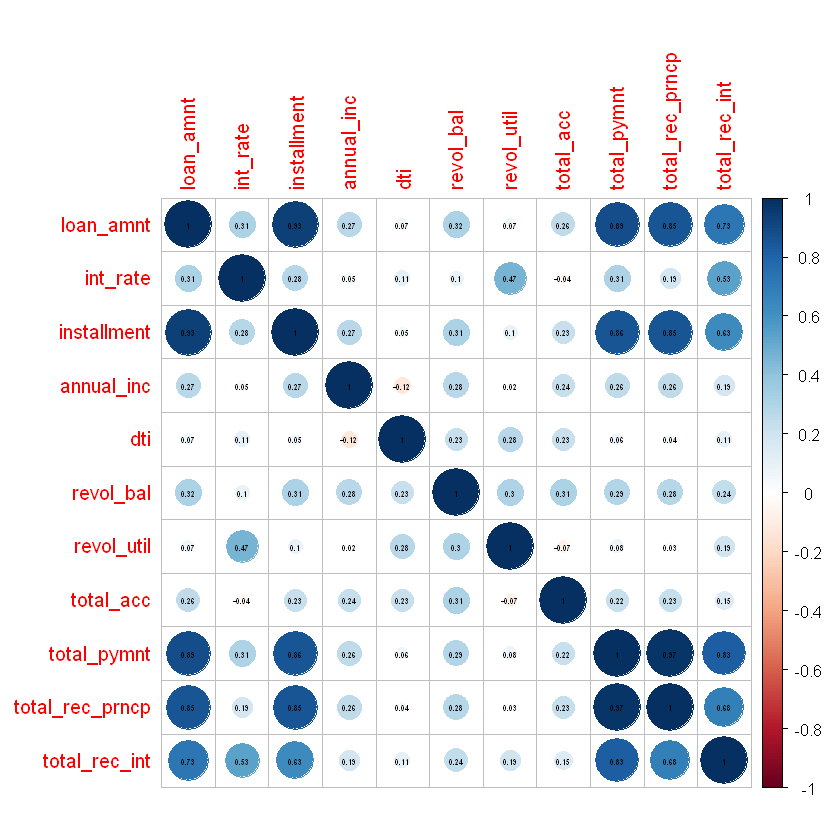

In [23]:
# plot the correlation matrix for continuous variables
corrplot(cor(df[ , names(df) %in% contcol]), addCoef.col = 1, number.cex = 0.4)

No id variables; using all as measure variables



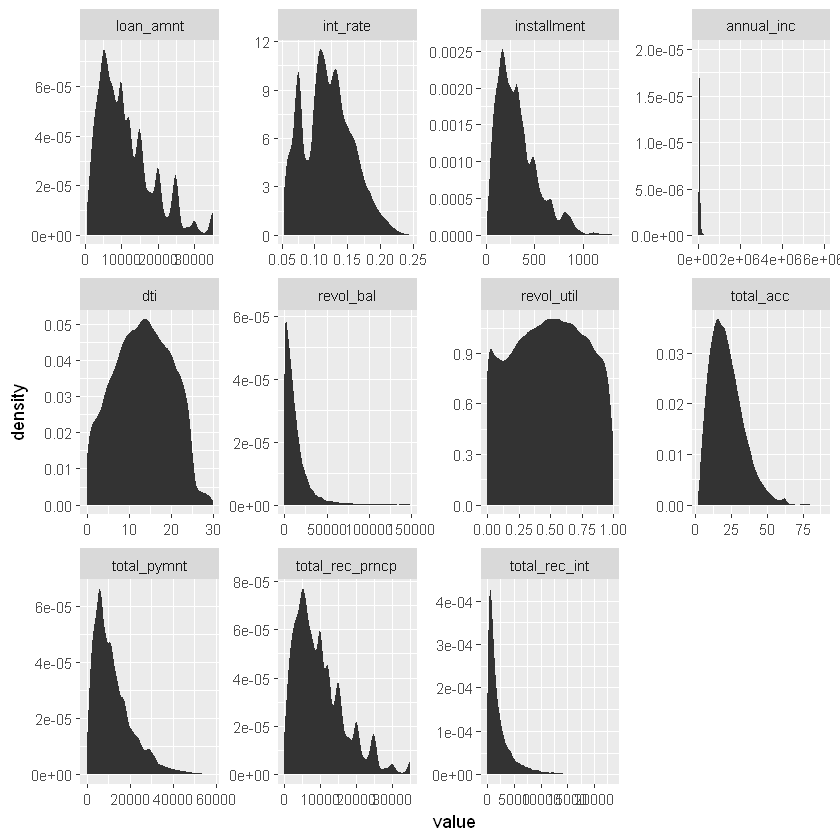

In [24]:
# plot the distribution of all continuous variables
ggplot(data = melt(df[, names(df) %in% contcol]), aes(x = value)) +
    stat_density() +
    facet_wrap(~variable, scales = "free")

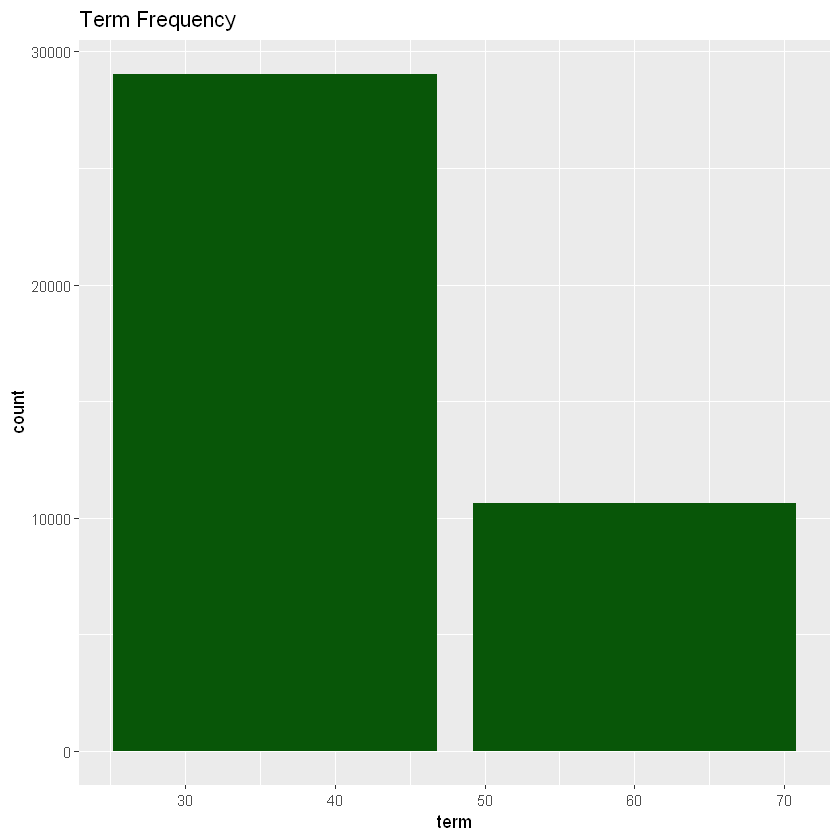

In [25]:
# plot the frequency of category variables
# term
ggplot(data = df) + 
    geom_bar(aes(x = term), fill = "#085608") +
    labs(title = "Term Frequency")

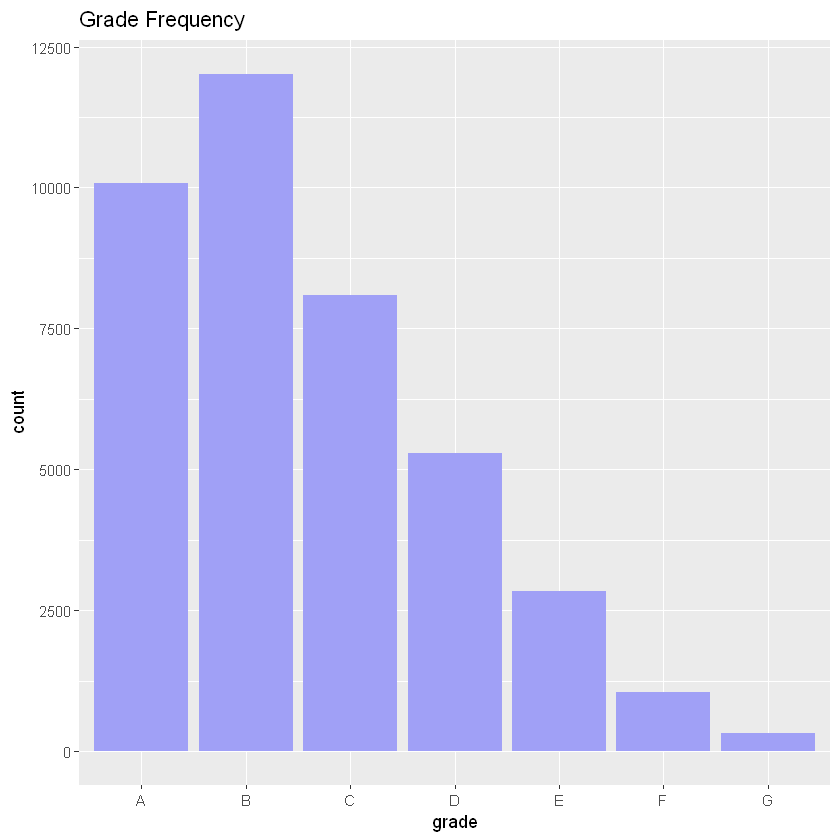

In [26]:
# grade
ggplot(data = df) + 
    geom_bar(aes(x = grade), fill = "#a0a0f6") +
    labs(title = "Grade Frequency")

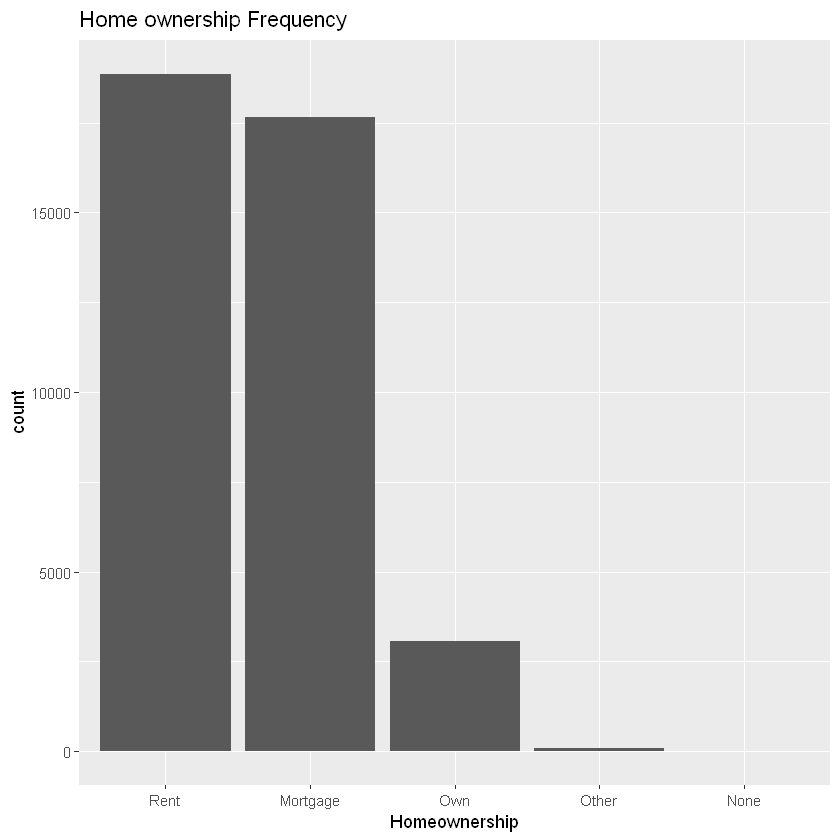

In [27]:
# home_ownership
ggplot(data = df) + 
    geom_bar(aes(x = reorder(home_ownership, home_ownership, function(x) - length(x)))) +
    labs(title = "Home ownership Frequency", x = "Homeownership")

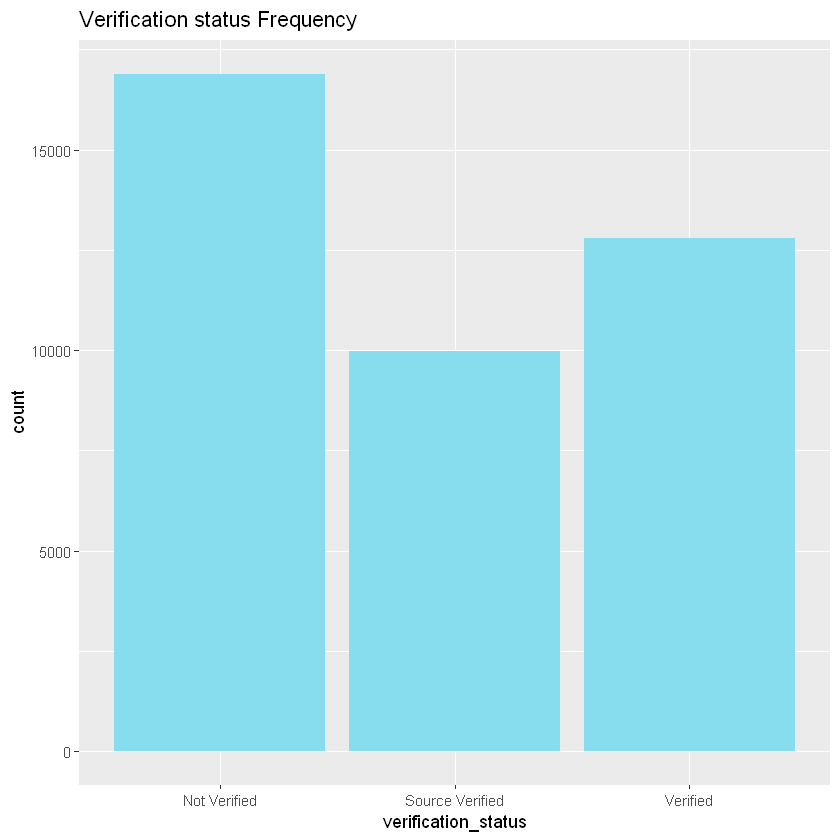

In [28]:
# verification_status
ggplot(data = df) + 
    geom_bar(aes(x = verification_status), fill = "#87ddee") +
    labs(title = "Verification status Frequency")

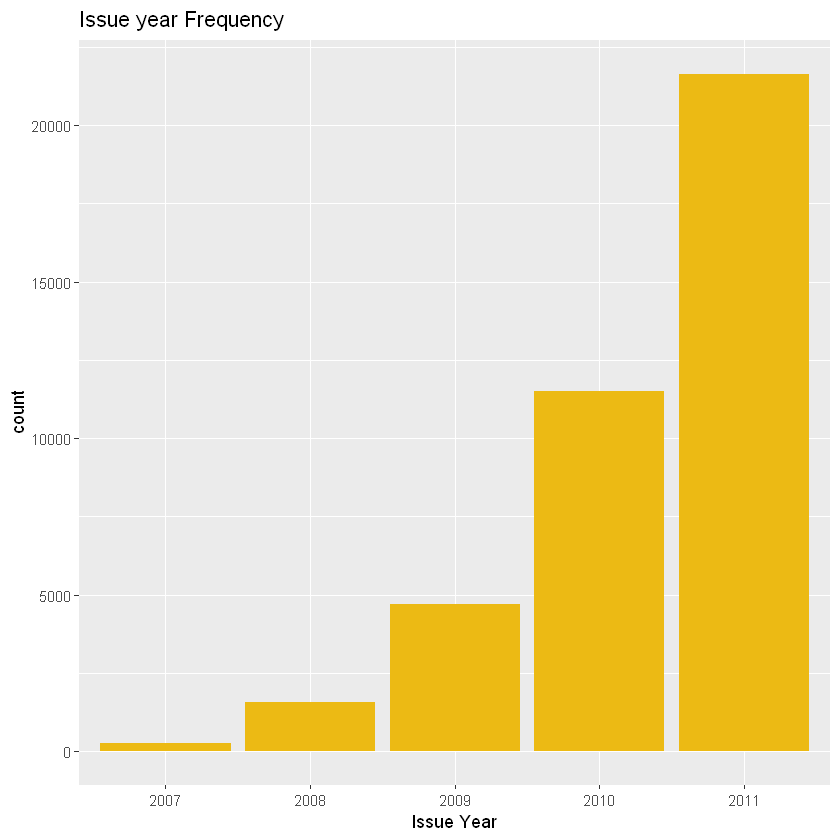

In [29]:
# issue_d
ggplot(data = df) + 
    geom_bar(aes(x = format(issue_d, "%Y")), fill = "#ecba14") +
    labs(title = "Issue year Frequency", x = "Issue Year", fill = "Issue Year")

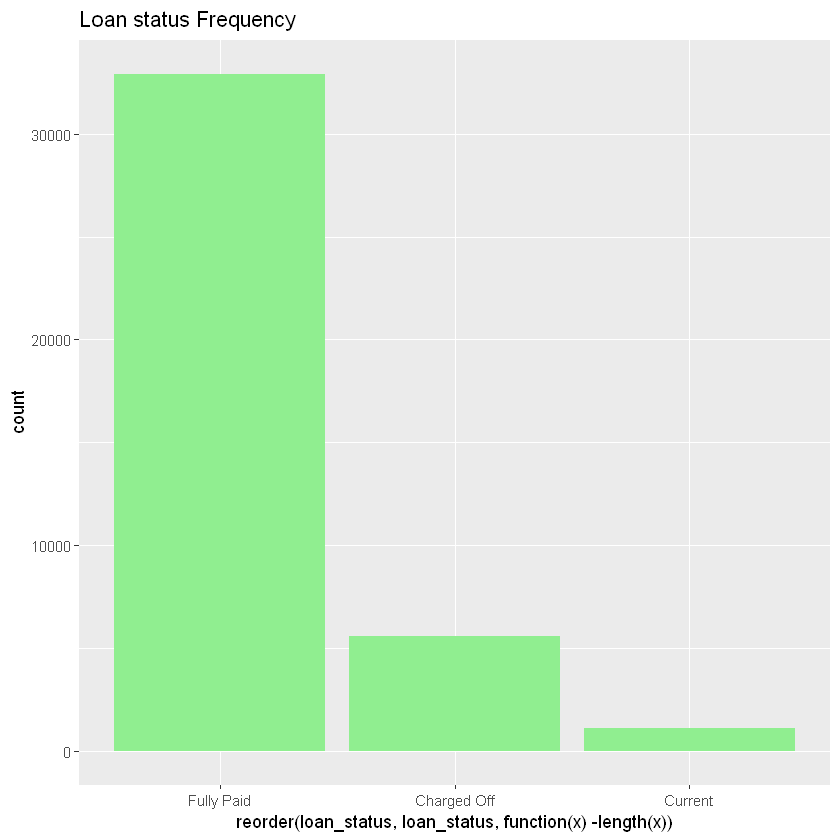

In [30]:
# loan_status
ggplot(data = df) + 
    geom_bar(aes(x = reorder(loan_status, loan_status, function(x) - length(x))), fill = "light green") +
    labs(title = "Loan status Frequency")

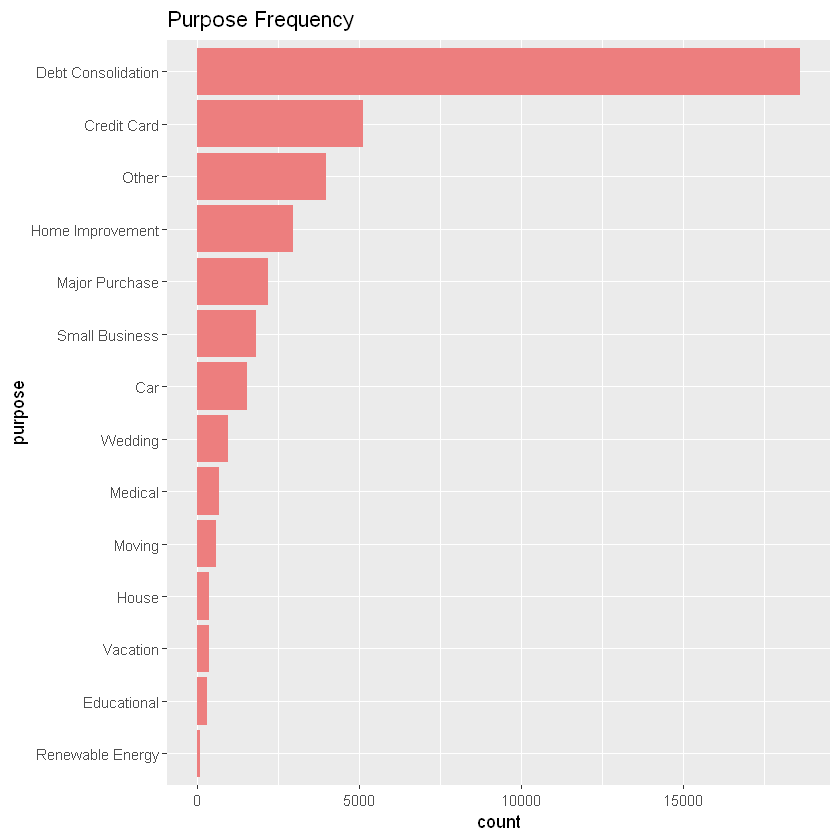

In [31]:
# purpose
ggplot(data = df) + 
    geom_bar(aes(x = reorder(purpose, purpose, function(x) length(x))), fill = "#ed7e7e") +
    coord_flip() +
    labs(title = "Purpose Frequency", x = "purpose")

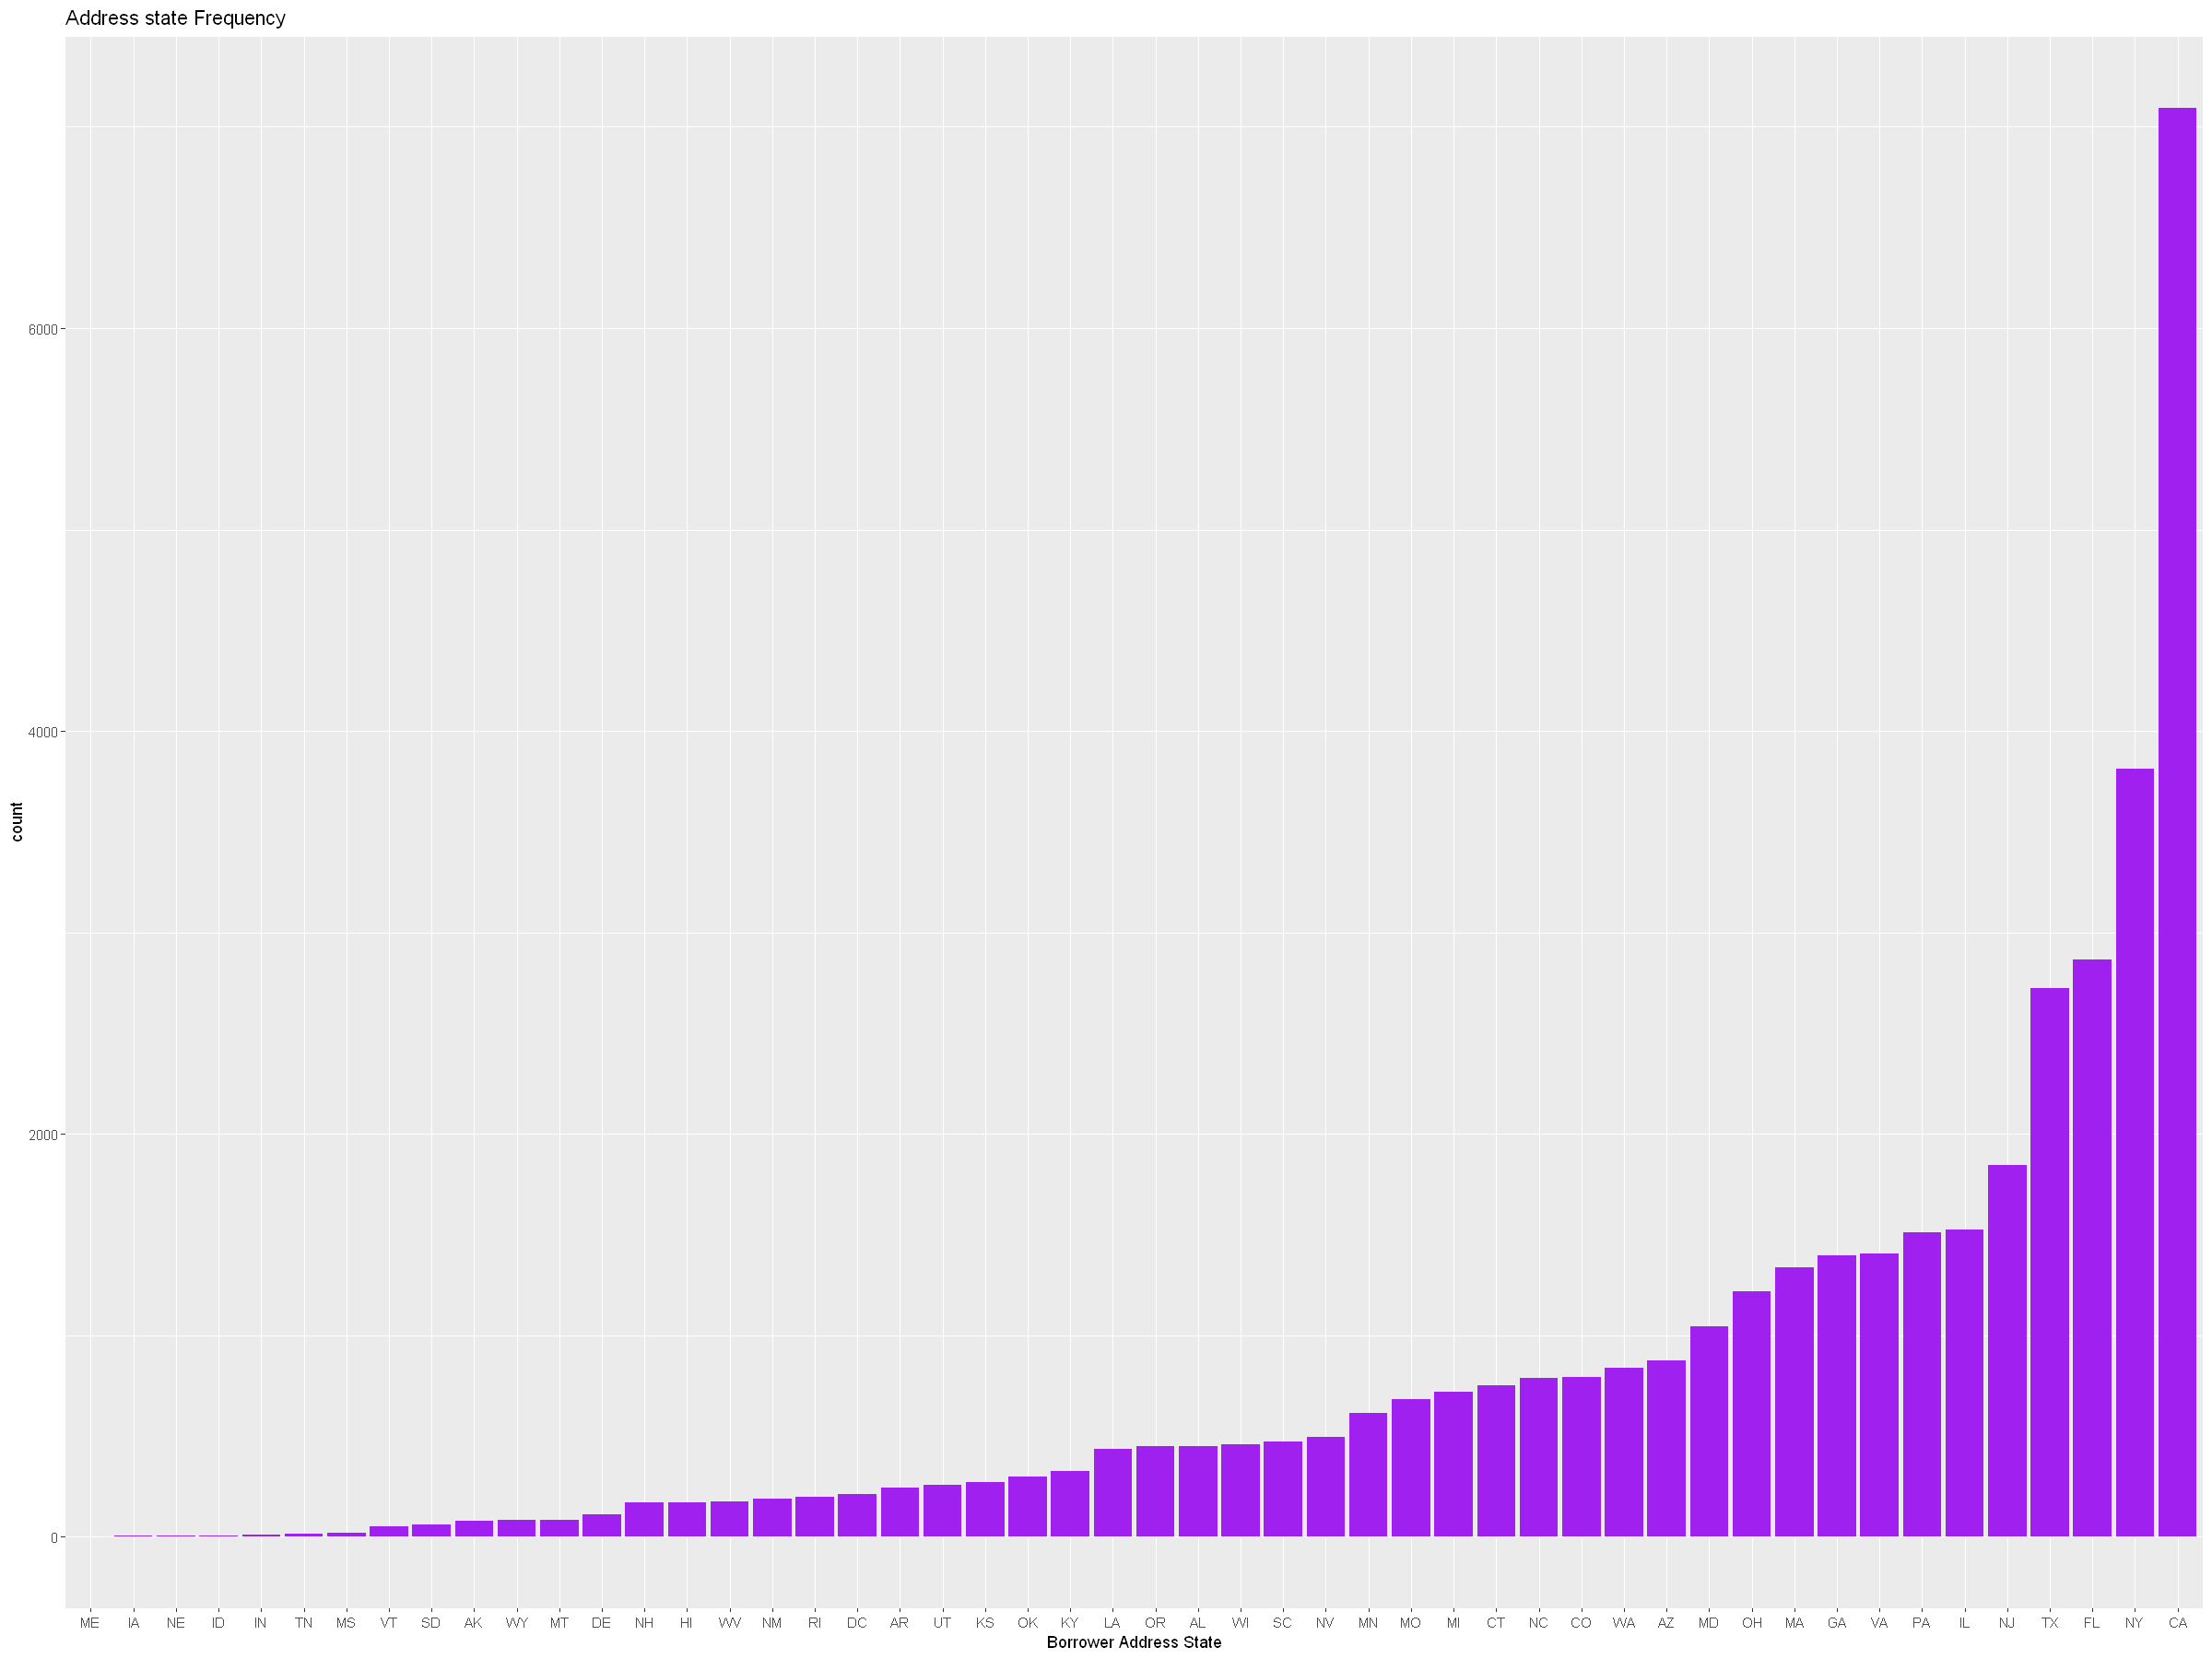

In [32]:
# addr_state
options(repr.plot.width=20, repr.plot.height=15)
ggplot(data = df) + 
    geom_bar(aes(x = reorder(addr_state, addr_state, function(x) length(x))), fill = "purple") +
    labs(title = "Address state Frequency", x = "Borrower Address State")

### 8. Export the cleaning dataset in to csv file <a name="exportfile"></a>

In [33]:
write.csv(df, "D:\\Data analysis\\practice tech skill\\Full prj\\Loan analysis\\Clean loandata.csv", row.names=FALSE)

You can get the clean loan dataset [here](https://github.com/linhdan2109/Portfolio_Projects/blob/main/Loan%20Analytics/Clean%20loandata.csv)

---

## Conclusion

In conclusion, the data cleaning process has successfully addressed various challenges in the raw dataset, resulting in an accurate dataset that is ready for further analysis. We have removed columns with too many NA values, columns that have only a unique value and unnecessary columns. We delete rows that have missing values, removed duplicates, and ensured data type consistency.

By addressing these issues, we have enhanced the reliability of the data and minimized the potential for misleading or erroneous analysis results. The thorough documentation of the cleaning process ensures transparency and reproducibility, allowing for a clear understanding of the transformations applied.

The cleaned dataset lays the foundation for meaningful and informed data analysis. We also draw some charts to understand more about our variables. Next, to do futher data analysis, I will load the cleaning data into SQL for deriving more meaningful insights that can help us to make data-driven decisions for the business. You can see the data analytics process in SQL [here](https://github.com/linhdan2109/Portfolio_Projects/blob/main/Loan%20Analytics/Data%20Analysis%20process.md)